### Hypothesis Testing in Python

In this example, we test our sample data on the average height of people in the UK.

You import the data set, perform basic EDA and conduct a hypothesis test of a mean to investigate whether the true population estimate is significantly different from 165cm and 166cm.  

In [1]:
# upload the csv file and create a dataframe

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt 
import scipy.stats as st
import seaborn as sns

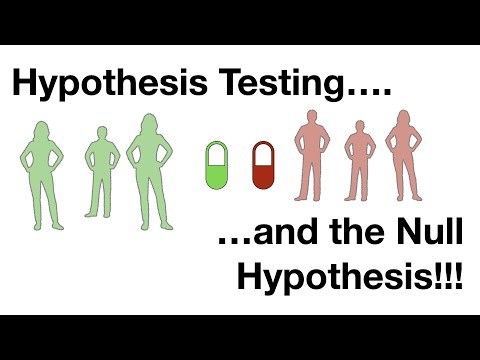

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('0oc49DyA3hU',start=12,width=800, height=600)

In [14]:
from IPython.display import IFrame
url = "https://statisticsbyjim.com/hypothesis-testing/statistical-inference/"
width = 1000
height = 350
IFrame(url, width=width, height=height)

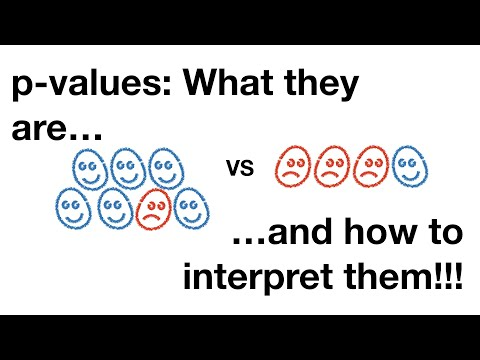

In [15]:
YouTubeVideo('vemZtEM63GY',start=12,width=800, height=600)

>  🚀 What p values represent is [notoriously difficult to remember](https://link.springer.com/article/10.1007/s10654-016-0149-3). To help you, Jim Frost explains p values clearly below: https://statisticsbyjim.com/hypothesis-testing/interpreting-p-values/

In [16]:
url = "https://statisticsbyjim.com/hypothesis-testing/interpreting-p-values/"
IFrame(url, width=width, height=height)

Selecting the right statistical test is essential to evaluate our hypothesis correctly. 

We can avoid wrong results or conclusions by knowing our tests better, and ideally by consulting a statistician, data analyst, or data scientist. So don't hesitate to double-check your choices and assumptions with a knowledgeable colleague. 

Below are two tools that can help you find the appropriate statistical test to support you in that discussion.

The first tool is the statistical test flow chart: https://www.statsflowchart.co.uk/

In [18]:
url = "https://www.statsflowchart.co.uk/"
IFrame(url, width=width, height=height)

>  🚀 While here is another excellent guide to selecting the right test. It is a little more technical and does not provide Python code, but is a very useful resource to consider your choices in more detail: https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/

In [17]:
url = "https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/"
IFrame(url, width=width, height=height)

In [2]:
df = pd.read_csv('height.csv')

In [3]:
df.head(20)

,ID,Height
0,1000,187.849361
1,1004,171.398172
2,1008,172.183314
3,1011,142.268503
4,1016,174.386182
5,1020,166.732718
6,1026,148.089283
7,1032,167.157226
8,1035,163.767044
9,1040,167.986396


Perform some basic EDA
* Descriptive Statistics
* Visualisations

In [4]:
print('Sample Mean: ', df['Height'].mean())
print('Sample Std: ', df['Height'].std())

Sample Mean:  165.2708312773
Sample Std:  9.748050193802772


<Axes: >

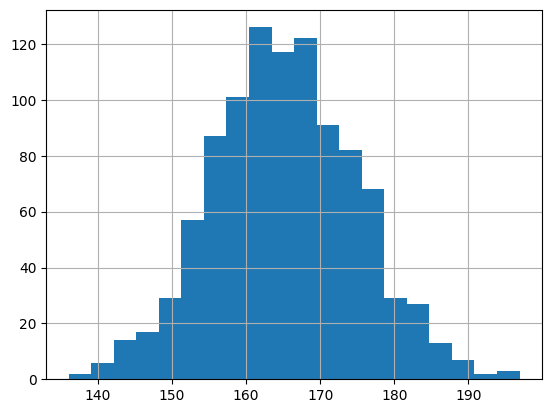

In [5]:
df['Height'].hist(bins=20)

We can see our data looks normally ditributed - this is important as the distribution determines the statistical test we will use.

We can run a Shapiro-Wilk test to determine the probabiity our sample is normally distributed.

The p-value is the probability of the sample being normally distributed, as long as this is greater than our level of significance, we can assume our sample is normally distributed.  

In [6]:
null_hypothesis = "The data is normally distributed or call it Gaussian"

alternative_hypothesis = "the data is not normally distributed"

In [7]:
from scipy.stats import shapiro

alpha = 0.05 # significance level = (1 - required confidence level)

stat, p = shapiro(df['Height'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('The sample is p=%.3f normally distributed' % (p))
else:
	print('Probably not not normally distributed')

stat=0.999, p=0.853
The sample is p=0.853 normally distributed


In [8]:
# augostino
from scipy.stats import normaltest
stat, p = normaltest(df['Height'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('The sample is p=%.3f normally distributed' % (p))
else:
	print('Probably not not normally distributed')


stat=0.936, p=0.626
The sample is p=0.626 normally distributed


In [9]:
from scipy.stats import anderson
stat, p = normaltest(df['Height'])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('The sample is p=%.3f normally distributed' % (p))
else:
	print('Probably not not normally distributed')


stat=0.936, p=0.626
The sample is p=0.626 normally distributed


We can now declare a null and alternative hypothesis.  

Suppose we want to test our estimate that true population average height is 165cm

* Null: Average Height of population is NOT different from 165cm
* Alt: Average Height of population is different from 165cm

The question is, do we have enough evidence to REJECT the null hypothesis?

That depends on how much data we have, how spread out that data is, how far the mean of our sample is away from 165cm and how confident we want to be that true population mean falls within our sample.  

We work out the z-score = (Mean of Sample - Hypothesized Mean) / Std Error

Std Error = Sample Std Dev / Sqrt(number of observations)

Once we have the z-Score we can calculate the p-Value.

The p-Value is the probability the observation we see in our data (Mean = 164.86) came about as a result of random chance.  So if this is less than our level of significance (say 0.05 or 5%), we can be 95% sure the real, true population mean is represented by our sample.  

We say our sample mean is statistically significant if p-value < level of significance.

Confidence Interval	 - Level of Significance	- Critical Z-Score
* 75%	- 25% -	1.15
* 90%	- 10% -	1.64
* 95%	- 5% - 1.96
* 99%	- 1% -	2.57


**A p-value is the probability that random chance generated the data, or something else that is rarer!**



**The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true! NOT the probability that the null hypothesis is true!.**

In [10]:
# Hypothesis Test One

hypothesized_mean = 165
n = 1000   # number of samples
sl = 0.05

sample_mean = df['Height'].mean()

sample_std = df['Height'].std()

SE = sample_std/np.sqrt(n)

Z_Score = (sample_mean - hypothesized_mean) / SE

critical_z = st.norm.ppf(1-sl/2)

ci = st.norm.cdf(critical_z)

p_value = scipy.stats.norm.sf(abs(Z_Score))*2

print('Standard Error:', SE)
print('Z-Score:', Z_Score)
print('Critical Z:', critical_z)
print('Confidence Interval:', 1-sl)
print('p-value:', p_value)
print()
if p_value > sl:
  print('Not enough evidence to reject null')
else:
  print('Reject the null')
  print('The true population estimate is significantly different from', sample_mean, 'at the', 1-sl, 'level' )
print()
print('68% confidence interval:', sample_mean - (1.0 * SE), " - ", sample_mean + (1.0 * SE))
print('75% confidence interval:', sample_mean - (1.15 * SE), " - ", sample_mean + (1.15 * SE))
print('95% confidence interval:', sample_mean - (1.96 * SE), " - ", sample_mean + (1.96 * SE))
print('99% confidence interval:', sample_mean - (2.57 * SE), " - ", sample_mean + (2.57 * SE))

Standard Error: 0.3082604135806255
Z-Score: 0.8785794911326448
Critical Z: 1.959963984540054
Confidence Interval: 0.95
p-value: 0.3796293198166677

Not enough evidence to reject null

68% confidence interval: 164.96257086371938  -  165.57909169088063
75% confidence interval: 164.91633180168228  -  165.62533075291773
95% confidence interval: 164.66664086668197  -  165.87502168791804
99% confidence interval: 164.4786020143978  -  166.0630605402022


In other words, the data supports the hypothesis that the population mean estimate is 165cm but does not support the hypothesis that the population mean estimate is 166cm.  

If your population estimate falls within the confidence interval, your sample provides enough evidence it is statitistically representative of the true population estimate.  

Change the number of sample sizes and change the significance level - sl to 0.1

Notice what happens when the p_value < sl !  Your hypothesized mean falls outside of the bounds of the confidence interval - and your sample is no longer representative - you don't have enough evidence!

In [11]:
# Hypothesis Test Two

hypothesized_mean = 167
n = 200   # number of samples
sl = 0.05

sample_mean = df['Height'].mean()
sample_std = df['Height'].std()
SE = sample_std/np.sqrt(n)
Z_Score = (sample_mean - hypothesized_mean) / SE
critical_z = st.norm.ppf(1-sl/2)
ci = st.norm.cdf(critical_z)
p_value = scipy.stats.norm.sf(abs(Z_Score))*2

print('Standard Error:', SE)
print('Z-Score:', Z_Score)
print('Critical Z:', critical_z)
print('Confidence Interval:', 1-sl)
print('p-value:', p_value)
print()
if p_value > sl:
  print('Not enough evidence to reject null')
else:
  print('Reject the null')
  print('The true population estimate is significantly different from', sample_mean, 'at the', (1-sl), 'level' )
print()
print('68% confidence interval:', sample_mean - (1.0 * SE), " - ", sample_mean + (1.0 * SE))
print('75% confidence interval:', sample_mean - (1.15 * SE), " - ", sample_mean + (1.15 * SE))
print('95% confidence interval:', sample_mean - (1.96 * SE), " - ", sample_mean + (1.96 * SE))
print('99% confidence interval:', sample_mean - (2.57 * SE), " - ", sample_mean + (2.57 * SE))

Standard Error: 0.6892912395384779
Z-Score: -2.508618452568436
Critical Z: 1.959963984540054
Confidence Interval: 0.95
p-value: 0.012120432333268745

Reject the null
The true population estimate is significantly different from 165.2708312773 at the 0.95 level

68% confidence interval: 164.58154003776153  -  165.96012251683848
75% confidence interval: 164.47814635183076  -  166.06351620276925
95% confidence interval: 163.9198204478046  -  166.6218421067954
99% confidence interval: 163.4993527916861  -  167.0423097629139
